# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:ERIKA BUDIARTI
- Email:erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import joblib

### Menyiapkan data yang akan digunakan

In [3]:
employee_df = pd.read_csv("/content/employee_data.csv", encoding='windows-1252')

## Data Understanding

In [4]:
employee_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [5]:
employee_df.shape

(1470, 35)

In [6]:
employee_df.dtypes

EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [7]:
employee_df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [8]:
employee_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
employee_df.duplicated().sum()

0

In [10]:
employee_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## Data Preparation / Preprocessing

### Handling Missing Value

In [11]:
mode_value = employee_df['Attrition'].mode()[0]
employee_df['Attrition'].fillna(mode_value, inplace=True)

In [12]:
employee_df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Feature Engineering

In [13]:
employee_df['PerformanceSatisfactionIndex'] = employee_df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)
employee_df.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'],axis=1,inplace=True)

In [14]:
def satisfaction(score):
    score = float(score)
    if (score >= 1.00) and (score <= 1.99):
        return 'Low'
    elif (score >= 2.0) and (score <= 2.99):
        return 'Medium'
    elif (score >= 3.00) and (score <= 3.99):
        return 'High'
    else:
        return 'Very High'

employee_df['PerformanceSatisfactionIndex'] = employee_df['PerformanceSatisfactionIndex'].apply(satisfaction)

In [15]:
employee_df['ExperiencePriorToCurrentJob'] = employee_df['TotalWorkingYears'] - employee_df['YearsAtCompany']
employee_df.drop(['TotalWorkingYears', 'YearsAtCompany'],axis=1,inplace=True)

In [16]:
def experience(years):
    if (years >= 0) and (years <= 5):
        return 'Junior'
    elif (years >= 6) and (years <= 10):
        return 'Mid-level'
    elif (years >= 11) and (years <= 20):
        return 'Senior'
    elif (years >= 21) and (years <= 30):
        return 'Expert'
    else:
        return 'Veteran'

employee_df['ExperiencePriorToCurrentJob'] = employee_df['ExperiencePriorToCurrentJob'].apply(experience)

In [17]:
employee_df['EmployeeEngagementScore'] = (employee_df['JobInvolvement'] + employee_df['PerformanceRating'] + employee_df['WorkLifeBalance']) / 3
employee_df.drop(['JobInvolvement', 'PerformanceRating', 'WorkLifeBalance'],axis=1,inplace=True)

In [18]:
def engagement(score):
    score = float(score)
    if (score >= 1.00) and (score <= 1.99):
        return 'Bad'
    elif (score >= 2.0) and (score <= 2.99):
        return 'Good'
    elif (score >= 3.00) and (score <= 3.99):
        return 'Better'
    else:
        return 'Best'

employee_df['EmployeeEngagementScore'] = employee_df['EmployeeEngagementScore'].apply(engagement)

In [19]:
def distance_category(distance):
    if (distance >= 1) & (distance <= 10):
        return 'Short Distance'
    elif (distance >= 11) & (distance <= 20):
        return 'Medium Distance'
    else:
        return 'Long Distance'

employee_df['DistanceFromHomeCategory'] = employee_df['DistanceFromHome'].apply(distance_category)
employee_df.drop(['DistanceFromHome'],axis=1,inplace=True)

In [20]:
def generation(age):
    if (age >= 61) & (age <= 70):
        return 'Baby Boomers'
    elif (age >= 51) & (age <= 60):
        return 'Gen X'
    elif (age >= 41) & (age <= 50):
        return 'Gen Y'
    elif (age >= 31 ) & (age <= 40):
        return 'Millennials'
    else:
        return 'Gen Z'

employee_df['AgeGeneration'] = employee_df['Age'].apply(generation)
employee_df.drop(['Age'],axis=1,inplace=True)

In [21]:
# Mapping
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
employee_df['Education'] = employee_df['Education'].map(education_map)

job_level_mapping = {
    1: 'Staff',
    2: 'Junior Supervisor',
    3: 'Senior Supervisor',
    4: 'Junior Manager',
    5: 'Senior Manager'
}
employee_df['JobLevel'] = employee_df['JobLevel'].map(job_level_mapping)

In [22]:
employee_df.drop(['StandardHours','EmployeeCount', 'Over18'],axis=1,inplace=True)

employee_df = employee_df.reindex(sorted(employee_df.columns), axis=1)
employee_df.dtypes

AgeGeneration                    object
Attrition                       float64
BusinessTravel                   object
DailyRate                         int64
Department                       object
DistanceFromHomeCategory         object
Education                        object
EducationField                   object
EmployeeEngagementScore          object
EmployeeId                        int64
ExperiencePriorToCurrentJob      object
Gender                           object
HourlyRate                        int64
JobLevel                         object
JobRole                          object
MaritalStatus                    object
MonthlyIncome                     int64
MonthlyRate                       int64
NumCompaniesWorked                int64
OverTime                         object
PercentSalaryHike                 int64
PerformanceSatisfactionIndex     object
StockOptionLevel                  int64
TrainingTimesLastYear             int64
YearsInCurrentRole                int64


In [23]:
employee_df.head()

,AgeGeneration,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHomeCategory,Education,EducationField,EmployeeEngagementScore,EmployeeId,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceSatisfactionIndex,StockOptionLevel,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Millennials,0.0,Travel_Frequently,1444,Human Resources,Short Distance,Master,Other,Better,1,...,5224,0,Yes,11,Medium,1,2,2,1,2
1,Millennials,1.0,Travel_Rarely,1141,Research & Development,Medium Distance,College,Medical,Bad,2,...,14382,5,No,15,Low,0,2,0,0,0
2,Gen X,1.0,Travel_Rarely,1323,Research & Development,Short Distance,Master,Life Sciences,Better,3,...,10332,9,Yes,12,Medium,3,2,0,2,7
3,Gen Y,0.0,Travel_Frequently,555,Sales,Long Distance,Bachelor,Marketing,Better,4,...,14864,5,No,14,High,1,2,4,4,8
4,Millennials,0.0,Travel_Rarely,1194,Research & Development,Short Distance,Master,Medical,Better,5,...,12549,2,No,14,Medium,3,2,3,0,2


### Exploratory Data Analysis

In [24]:
employee_df['Attrition'] = employee_df['Attrition'].factorize(['No','Yes'])[0]
employee_df['Attrition'].value_counts()

0    1291
1     179
Name: Attrition, dtype: int64

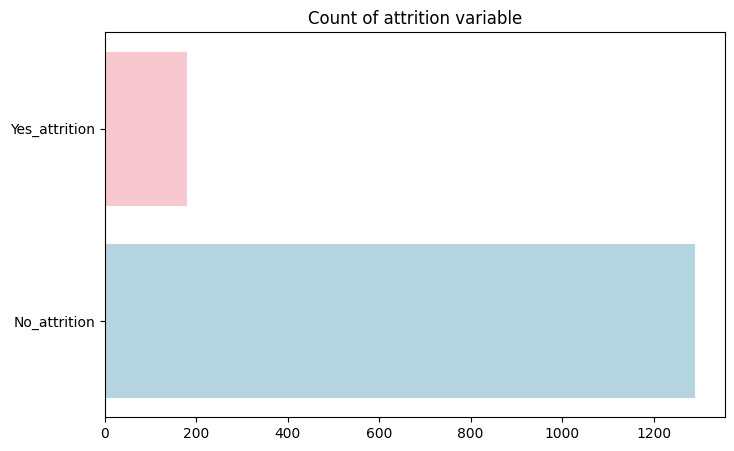

In [25]:
attrition = employee_df[employee_df['Attrition'] == 1]
no_attrition = employee_df[employee_df['Attrition'] == 0]

attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

categories = ['Yes_attrition', 'No_attrition']
counts = [attrition_count, no_attrition_count]

plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=categories, hue=categories, palette=['pink', 'lightblue'], dodge=False, legend=False)

plt.title('Count of attrition variable')
plt.show()

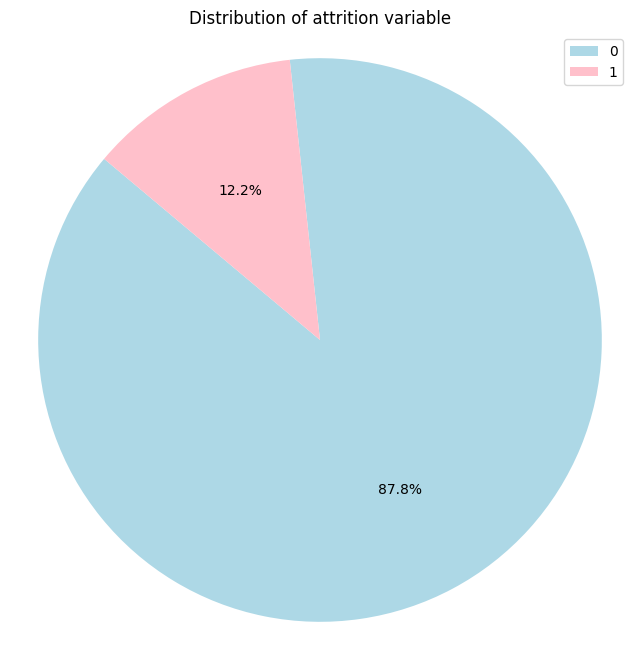

In [26]:
plt.figure(figsize=(8, 8))

attrition_counts = employee_df['Attrition'].value_counts()
labels = attrition_counts.index
sizes = attrition_counts.values
colors = ['lightblue', 'pink']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140, labeldistance=0.7)
plt.axis('equal')
plt.legend(labels, loc="best")

plt.title('Distribution of attrition variable')
plt.show()

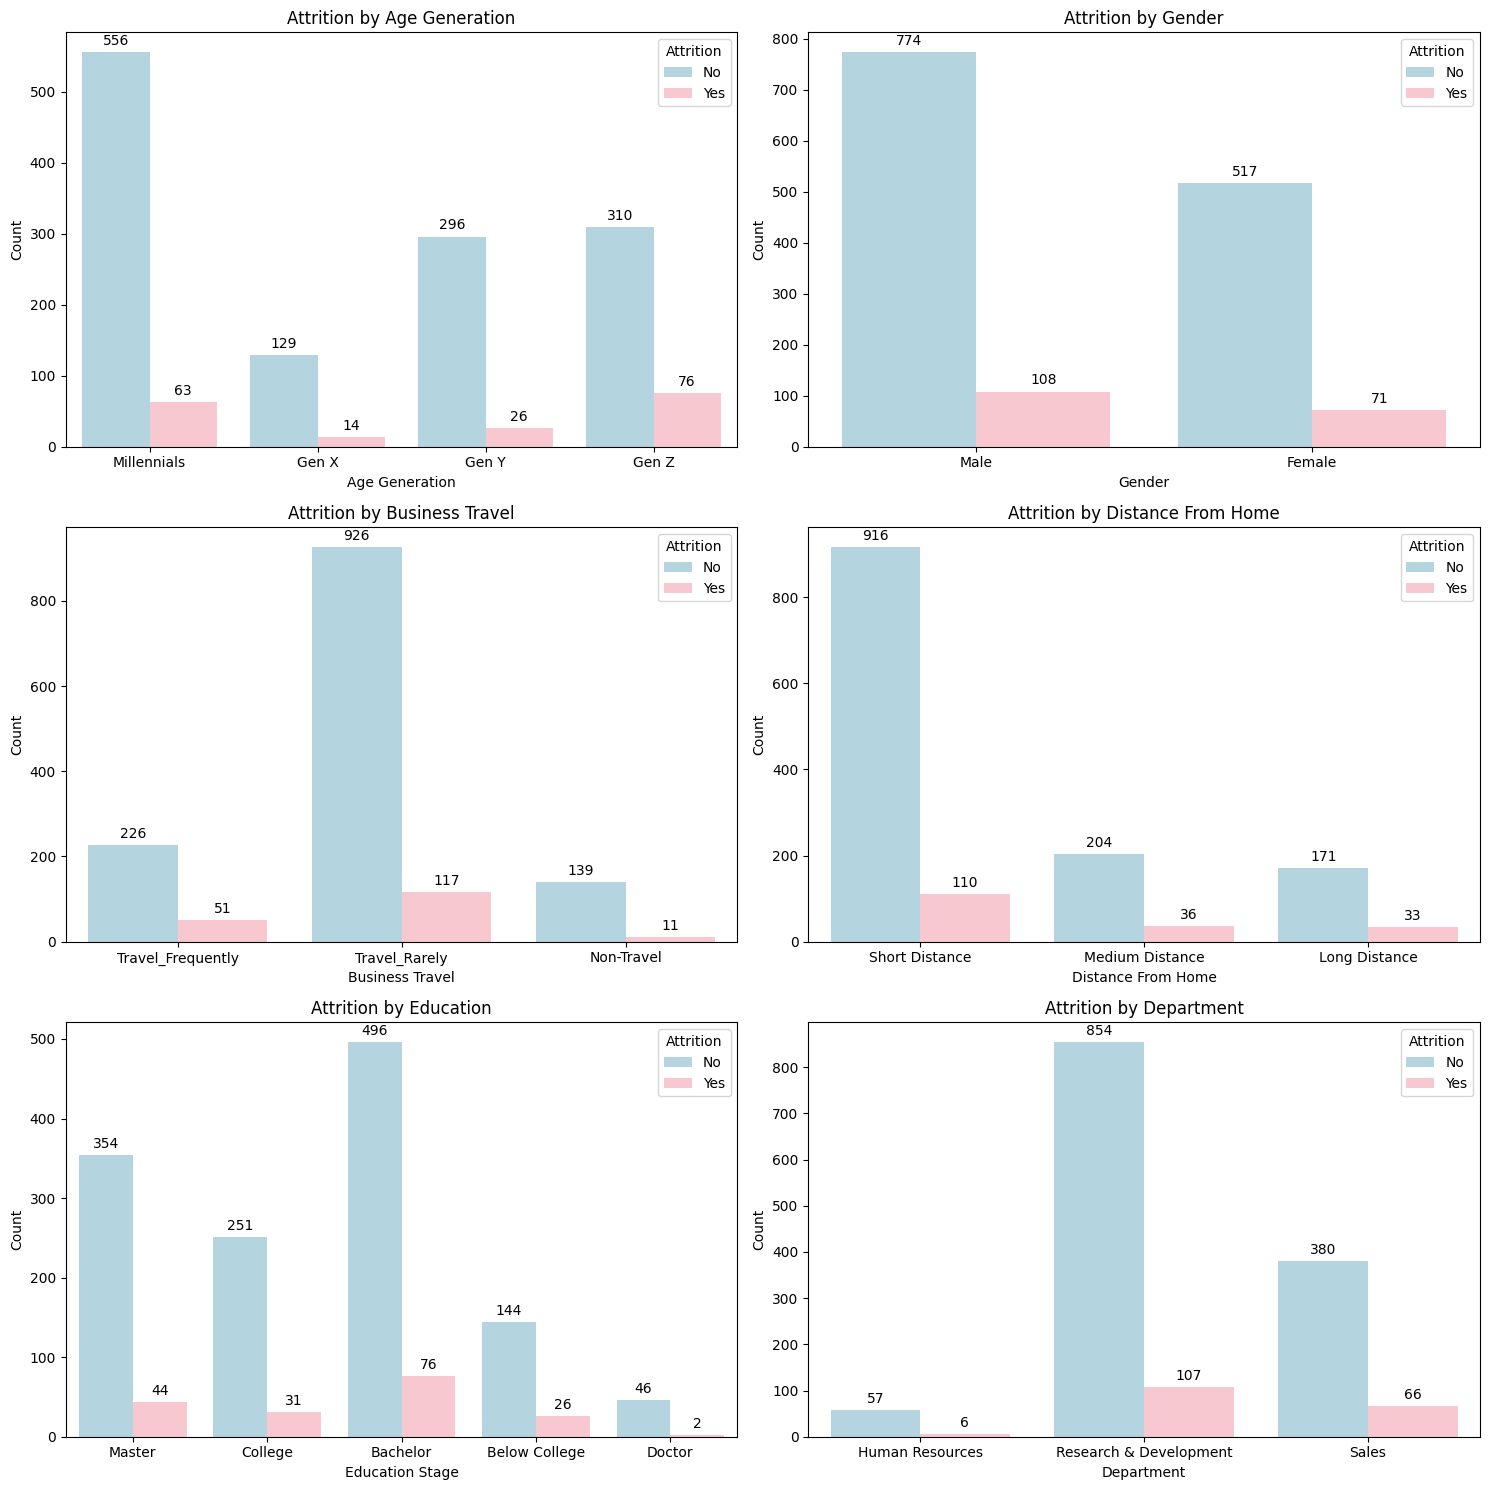

In [27]:
# Define color palette
colors = ['lightblue', 'pink']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot Attrition by Age Generation
sns.countplot(x='AgeGeneration', hue='Attrition', data=employee_df, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Age Generation')
axes[0, 0].set_xlabel('Age Generation')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=employee_df, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Business Travel
sns.countplot(x='BusinessTravel', hue='Attrition', data=employee_df, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Business Travel')
axes[1, 0].set_xlabel('Business Travel')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Distance From Home
sns.countplot(x='DistanceFromHomeCategory', hue='Attrition', data=employee_df, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Attrition by Distance From Home')
axes[1, 1].set_xlabel('Distance From Home')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Education
sns.countplot(x='Education', hue='Attrition', data=employee_df, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Attrition by Education')
axes[2, 0].set_xlabel('Education Stage')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=employee_df, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Attrition by Department')
axes[2, 1].set_xlabel('Department')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

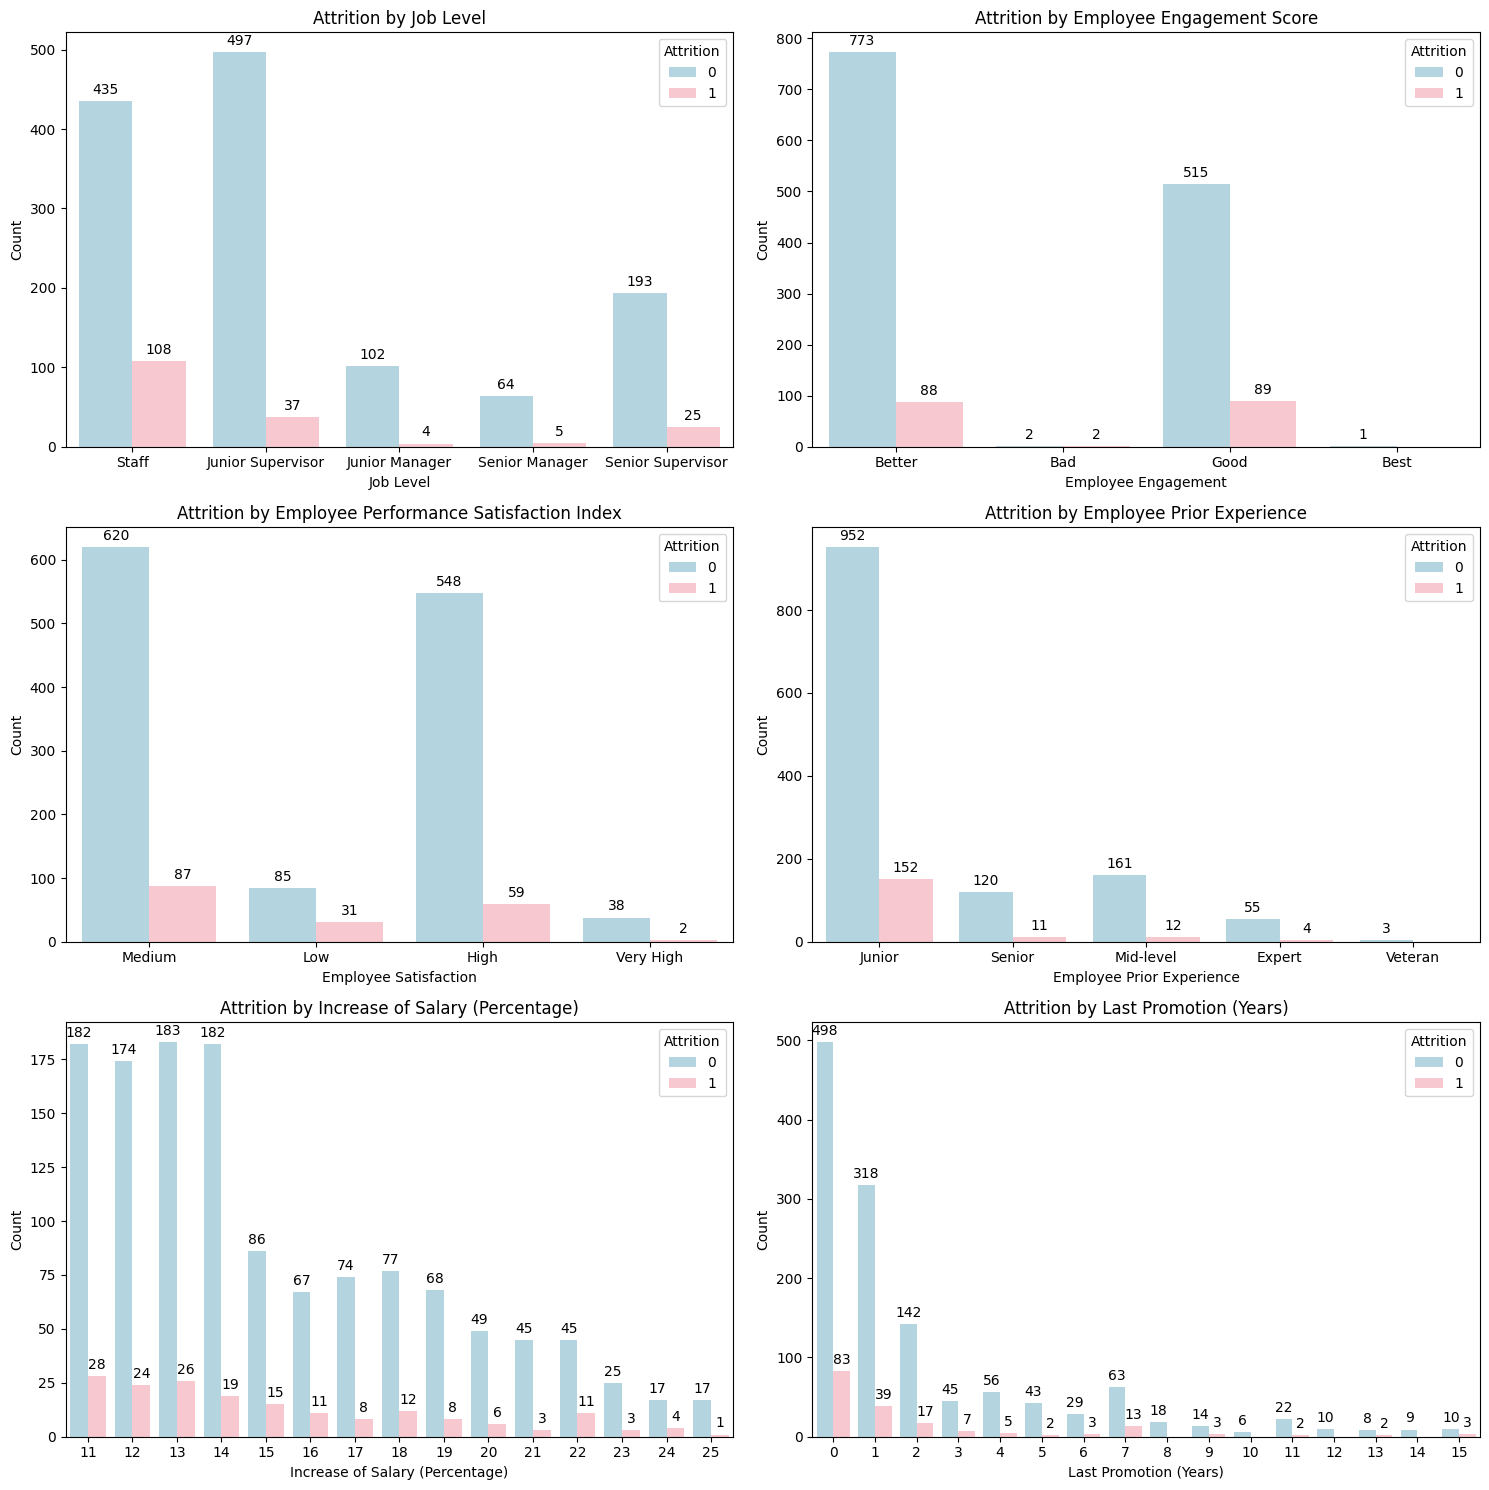

In [28]:
# Define color palette
colors = ['lightblue', 'pink']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot Attrition by Job Level
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Job Level')
axes[0, 0].set_xlabel('Job Level')
axes[0, 0].set_ylabel('Count')
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Employee Engagement Score
sns.countplot(x='EmployeeEngagementScore', hue='Attrition', data=employee_df, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Employee Engagement Score')
axes[0, 1].set_xlabel('Employee Engagement')
axes[0, 1].set_ylabel('Count')
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Employee Performance Satisfaction Index
sns.countplot(x='PerformanceSatisfactionIndex', hue='Attrition', data=employee_df, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Employee Performance Satisfaction Index')
axes[1, 0].set_xlabel('Employee Satisfaction')
axes[1, 0].set_ylabel('Count')
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Employee Prior Experience
sns.countplot(x='ExperiencePriorToCurrentJob', hue='Attrition', data=employee_df, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Attrition by Employee Prior Experience')
axes[1, 1].set_xlabel('Employee Prior Experience')
axes[1, 1].set_ylabel('Count')
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Percent Salary Hike
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=employee_df, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Attrition by Increase of Salary (Percentage)')
axes[2, 0].set_xlabel('Increase of Salary (Percentage)')
axes[2, 0].set_ylabel('Count')
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Years Since Last Promotion
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=employee_df, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Attrition by Last Promotion (Years)')
axes[2, 1].set_xlabel('Last Promotion (Years)')
axes[2, 1].set_ylabel('Count')
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')


# Adjust layout
plt.tight_layout()
plt.show()

## Modeling

In [29]:
# Filter Categorical Features
category_cols = employee_df.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,AgeGeneration,BusinessTravel,Department,DistanceFromHomeCategory,Education,EducationField,EmployeeEngagementScore,ExperiencePriorToCurrentJob,Gender,JobLevel,JobRole,MaritalStatus,OverTime,PerformanceSatisfactionIndex
0,Millennials,Travel_Frequently,Human Resources,Short Distance,Master,Other,Better,Junior,Male,Staff,Human Resources,Married,Yes,Medium
1,Millennials,Travel_Rarely,Research & Development,Medium Distance,College,Medical,Bad,Senior,Female,Junior Supervisor,Healthcare Representative,Married,No,Low
2,Gen X,Travel_Rarely,Research & Development,Short Distance,Master,Life Sciences,Better,Mid-level,Male,Staff,Research Scientist,Married,Yes,Medium
3,Gen Y,Travel_Frequently,Sales,Long Distance,Bachelor,Marketing,Better,Junior,Female,Junior Manager,Sales Executive,Married,No,High
4,Millennials,Travel_Rarely,Research & Development,Short Distance,Master,Medical,Better,Senior,Female,Staff,Research Scientist,Married,No,Medium


In [30]:
category_cols.nunique()

AgeGeneration                   4
BusinessTravel                  3
Department                      3
DistanceFromHomeCategory        3
Education                       5
EducationField                  6
EmployeeEngagementScore         4
ExperiencePriorToCurrentJob     5
Gender                          2
JobLevel                        5
JobRole                         9
MaritalStatus                   3
OverTime                        2
PerformanceSatisfactionIndex    4
dtype: int64

In [31]:
label_encoder=LabelEncoder()
columns_to_encode = ['Attrition', 'OverTime', 'AgeGeneration', 'BusinessTravel', 'Department', 'DistanceFromHomeCategory',
                     'Education', 'EducationField', 'EmployeeEngagementScore', 'MaritalStatus', 'ExperiencePriorToCurrentJob',
                     'JobLevel', 'JobRole', 'Gender', 'PerformanceSatisfactionIndex']

for column in columns_to_encode:
    employee_df[column] = label_encoder.fit_transform(employee_df[column])

In [32]:
emp_df = employee_df.drop(['YearsInCurrentRole' , 'YearsSinceLastPromotion', 'YearsWithCurrManager'],axis=1)
emp_df.head()

,AgeGeneration,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHomeCategory,Education,EducationField,EmployeeEngagementScore,EmployeeId,...,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceSatisfactionIndex,StockOptionLevel,TrainingTimesLastYear
0,3,0,1,1444,0,2,4,4,2,1,...,1,1,2991,5224,0,1,11,2,1,2
1,3,1,2,1141,1,1,2,3,0,2,...,0,1,4777,14382,5,0,15,1,0,2
2,0,1,2,1323,1,2,4,1,2,3,...,6,1,2461,10332,9,1,12,2,3,2
3,1,0,1,555,2,0,0,2,2,4,...,7,1,13525,14864,5,0,14,0,1,2
4,3,0,2,1194,1,2,4,3,2,5,...,6,1,2001,12549,2,0,14,2,3,2


In [33]:
X=np.array(emp_df.drop(['Attrition'],axis=1))
y=np.array(emp_df['Attrition'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1176, 23)
(294, 23)


In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Logistic Regression


In [36]:
# Initialize the Logistic Regression classifier
clf_lr = LogisticRegression()

# Define the grid of hyperparameters
param_grid1 = {
    'C' :[0.1, 1, 10, 100],
    'max_iter': [100, 150, 200, 300],
    'multi_class': ['auto'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_lr_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_lr_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_lr_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistic Regression is", test_accuracy)


Best parameters: {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
The test accuracy score of Logistic Regression is 0.9013605442176871


## Evaluation

In [37]:
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Logistric Regression:")
print(lr_cm)

Confusion Matrix of Logistric Regression:
[[259   3]
 [ 26   6]]


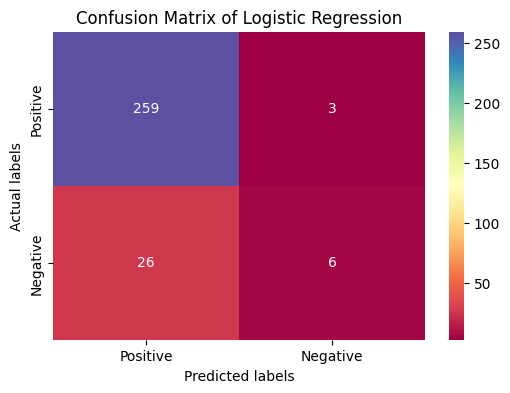

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, cmap='Spectral', fmt='g',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [39]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       262
           1       0.67      0.19      0.29        32

    accuracy                           0.90       294
   macro avg       0.79      0.59      0.62       294
weighted avg       0.88      0.90      0.88       294



## Deployment

In [40]:
# Save the model with joblib
joblib.dump(clf_lr_grid, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']